In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cons

# Infinite Square Well

In [2]:
N = 1000
H = np.zeros((N,N))
x = np.linspace(0.0,1.0,N)
xn = np.linspace(0.0,N-1,N)
a = 1.0

In [3]:
V = np.zeros(N)

In [4]:
##SETUP THE MATRIX H ALONG DIAGONALS AND NEAR DIAGONALS
for i in range(0,N):
    if (i<N-1):
        H[i,i+1] = -a
    if (i>0):
        H[i,i-1] = -a
    H[i,i] = 2*a+V[i]
print(H)

[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


In [5]:
w,v = eigh(H)

In [6]:
L = 1
n = 1
analyticWellFuncs = []
number = 1
for n in range(1,number+1):
    analyticWell = -np.sqrt(2/L)*np.sin(n*np.pi*x / L)
    
    analyticWellFuncs.append(analyticWell)

1


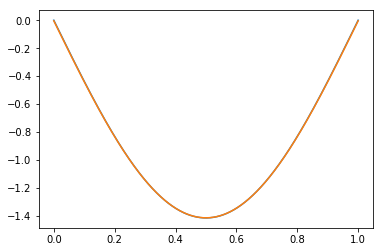

In [7]:

print(len(analyticWellFuncs))
plt.figure()

for i in range(0,len(analyticWellFuncs)):
    plt.plot(x,analyticWellFuncs[i])
plt.plot(x,v[:,0]/np.sqrt(1/N))

Wow! They're identical!

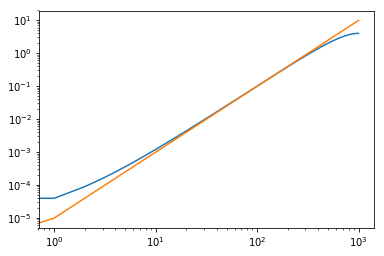

In [8]:
dx = 1/N
En = (dx**2)*(np.pi**2)*(xn**2)
plt.loglog(xn,w)
plt.loglog(xn,En)

The agreement is decent, except for deviations at the beginning and end. The beginning is off I think because of a lack of samples. Once enough samples get processed, it agrees amazingly! Eventually, though, it deviates again. This deviation is possibly due to rounding errors in the analytic solution.

3
a E = n*hbar*omega 

# Harmonic Oscillator

In [9]:
m = 1
omega = 1
hbar = np.sqrt(2*a*m*dx**2)
hbar

0.001414213562373095

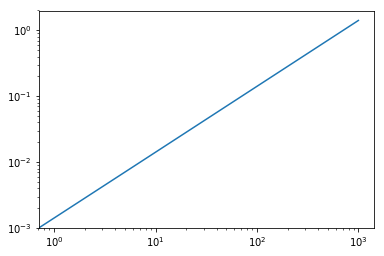

In [10]:
Evals = xn*hbar*omega
plt.loglog(xn,Evals)

In [11]:
N = 1000
H = np.zeros((N,N))
x = np.linspace(-0.5,0.5,N)
xn = np.linspace(0.0,N-1,N)
a = 1.0
V = 0.5*(np.linspace(-0.5,0.5,N))**2

In [12]:
##SETUP THE MATRIX H ALONG DIAGONALS AND NEAR DIAGONALS
for i in range(0,N):
    if (i<N-1):
        H[i,i+1] = -a
    if (i>0):
        H[i,i-1] = -a
    H[i,i] = 2*a+V[i]
print(H)

[[ 2.125    -1.        0.       ...  0.        0.        0.      ]
 [-1.        2.1245   -1.       ...  0.        0.        0.      ]
 [ 0.       -1.        2.124001 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  2.124001 -1.        0.      ]
 [ 0.        0.        0.       ... -1.        2.1245   -1.      ]
 [ 0.        0.        0.       ...  0.       -1.        2.125   ]]


In [13]:
w,v = eigh(H)

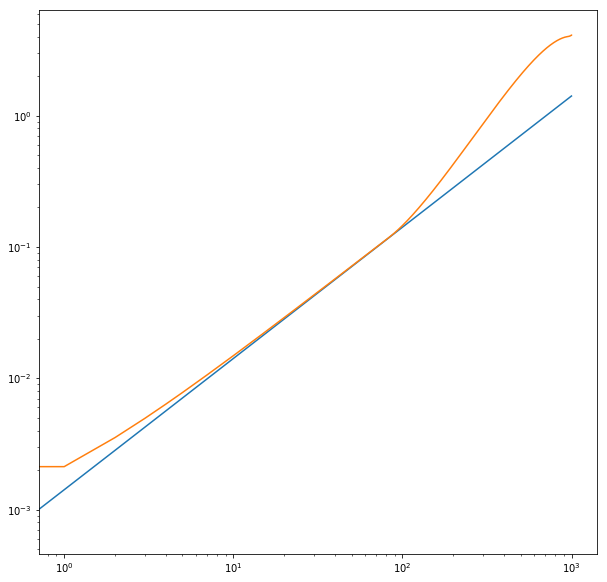

In [14]:
Evals = xn*hbar*omega
plt.figure(figsize=[10,10])
plt.loglog(xn,Evals)
plt.loglog(xn,w)

WoW! It lines up again, except for the later values. 

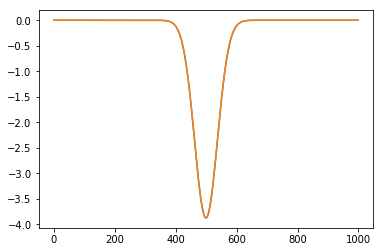

In [15]:
phinot = (1/(np.pi*hbar))**(1/4)*np.exp((-1/(2*hbar))*(x**2))
plt.plot(xn, v[:,0]/np.sqrt(dx))
plt.plot(xn, -phinot)

# Linear Potential

In [16]:
N = 1000
H = np.zeros((N,N))
xmax = N
x = np.linspace(0,1,N)
xn = np.linspace(0.0,N-1,N)
a = 1.0
V = x
dx = 1/N
hbar = np.sqrt(2)*dx

##SETUP THE MATRIX H ALONG DIAGONALS AND NEAR DIAGONALS
for i in range(0,N):
    if (i<N-1):
        H[i,i+1] = -a
    if (i>0):
        H[i,i-1] = -a
    H[i,i] = 2*a+V[i]
print(H)
w,v = eigh(H)

[[ 2.       -1.        0.       ...  0.        0.        0.      ]
 [-1.        2.001001 -1.       ...  0.        0.        0.      ]
 [ 0.       -1.        2.002002 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  2.997998 -1.        0.      ]
 [ 0.        0.        0.       ... -1.        2.998999 -1.      ]
 [ 0.        0.        0.       ...  0.       -1.        3.      ]]


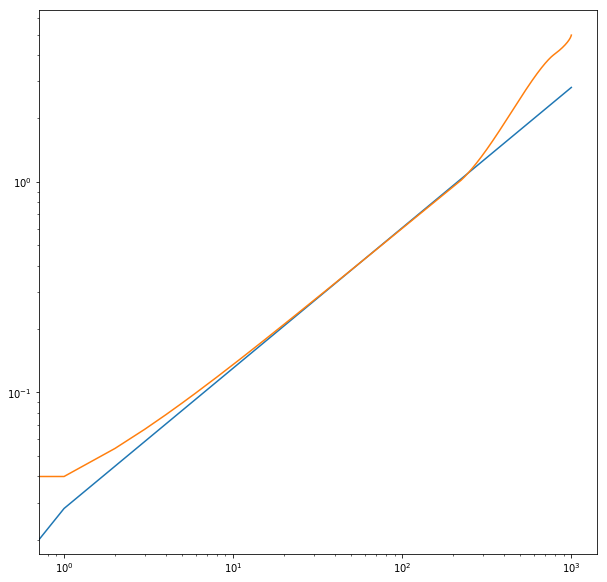

In [17]:
#Evals = ((3/2)*(x*dx**2 * np.pi))**(2/3)
Evals = ((3.0*pi*np.sqrt(2)*dx*xn)**(2/3))/(2.0)
plt.figure(figsize=[10,10])
plt.loglog(xn,Evals)
plt.loglog(xn,w)